# Random Forests
#### Abstract
This assignment describes Random Forests, a machine learning method for classification which is based on decision trees. The assignment first provides an introduction on Random forests, describing the technique and the relationship to decision trees. Then, the assignment describes a practical use case and includes an implementation example using standard libraries like [Sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). The last section includes some final conclusions. 



## **RANDOM FOREST**

### CLASSIFICATION BASED ON DECISION TREES
###### MAY 2021
##### This assignment describes Random Forests, a machine learning method for classification which is based on decision trees. The assignment first provides an introduction on Random forests, describing the technique and the relationship to decision trees. Then, the assignment describes a practical use case and includes an implementation example using standard libraries like Sklearn. The last section includes some final conclusions.
### Prepared by F GROUP:
> Fernando Pascual, María lloret, Carolina García & Ana Alonso
### **DECISION TREES**

> A Decision tree analysis "involves making a tree-shaped diagram to chart out a course of action or a statistical probability analysis. It is used to break down complex problems or branches. Each branch of the decision tree could be a possible outcome". A decision tree is drawn upside down with its root at the top.n decision analysis, a decision tree can be used to visually and explicitly represent decisions and decision making. As the name goes, it uses a tree-like model of decisions.. machine learning, covering both classification and regression.


```sh
01
Growing a tree involves deciding on which features to choose and what conditions to use for splitting,
along with knowing when to stop.
```
```sh
02
In Business Analytics , decision trees are mostly used to predict the probabilities of reaching
a result based on input variablessuch as age, sex, or other income.
```
```sh
03
The feature importance is clear and relations can be viewed easily.
```

### STEPS
When designing the tree, a series of steps must be followed:

- Definition of the problem.
- Tree drawing.
- Assigning probabilities to events.
- Estimation of the results for the combinations of the different possible alternatives.
- Choice of the most optimal solution reflected in the form of a router.

# Example

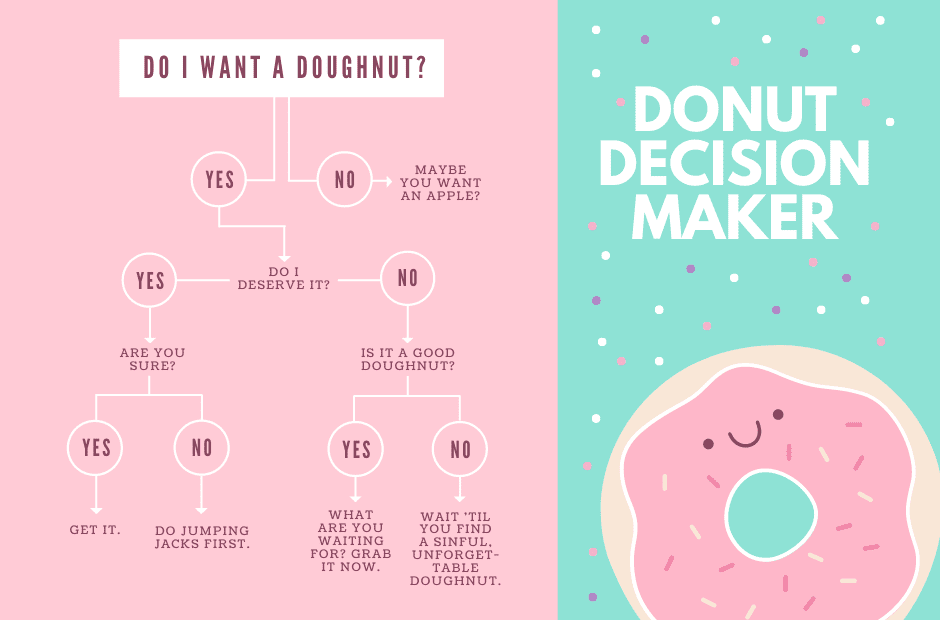

In [56]:
from IPython.display import Image
Image(filename='rf.png')

### **RANDOM FOREST**
> A Random Forest model is made up of a set of individual decision trees, each trained with a slightly different sample of the training data generated by bootstrapping. The prediction of a new observation is obtained by adding the predictions of all the individual trees that make up the model.

Many predictive methods generate global models in which a single equation applies to the entire sample space. When the use case involves multiple predictors, which interact with each other in a complex and non-linear way, it is very difficult to find a single global model that is capable of reflecting the relationship between the variables. Statistical and tree-based machine learning methods encompass a set of supervised non-parametric techniques that manage to segment the predictor space into simple regions, within which it is easier to handle interactions. It is this characteristic that provides them with much of their potential.

## RANDOM FOREST ADVANTAGES
> They are able to select predictors automatically.
They can be applied to regression and classification problems.
Trees can, in theory, handle both numerical and categorical predictors without having to create dummy or one-hot-encoding variables. In practice, this depends on the implementation of the algorithm that each library has.
As they are non-parametric methods, it is not necessary that any specific type of distribution be fulfilled.
They generally require much less cleaning and pre-processing of the data compared to other statistical learning methods (for example, they do not require standardization).
They are not heavily influenced by outliers.
If for any observation, the value of a predictor is not available, despite not being able to reach any terminal node, a prediction can be achieved using all the observations that belong to the last node reached. The accuracy of the prediction will be reduced but can at least be obtained.
They are very useful in data exploration, they allow to quickly and efficiently identify the most important variables (predictors).
Thanks to the Out-of-Bag Error, its validation error can be estimated without resorting to computationally expensive strategies such as cross-validation. This does not apply in the case of time series.
They have good scalability, they can be applied to data sets with a high number of observations.

## RANDOM FOREST DISADVANTAGES
> By combining multiple trees, the interpretability of single-tree models is lost.
When dealing with continuous predictors, they lose some of their information by categorizing them at the time of node splitting.
As described later, the creation of tree branches is achieved by the recursive binary splitting algorithm. This algorithm identifies and evaluates the possible divisions of each predictor according to a certain measure (RSS, Gini, entropy ...). Continuous predictors or qualitative predictors with many levels are more likely to contain, just by chance, some optimal cut-off point, which is why they tend to be favored in the creation of trees.
They are not able to extrapolate outside the range of the predictors observed in the training data.


# Implementation
## Practical use case
We are going to predict next day's max temperature in the city of Valencia based on the data of previous years from aemet and some (randomized) claims from a friend who claims to know how to predict the future.
For this task we will use random forests and python to train a machine learning model and be able to predict this temperature.
Finally our model got a mean absolute error of 1.52ºC, which means that the average real value vs the predicted is on average in an interval of +- 1.52ºC.
Therefore our model got an accuracy of 92.4 %.
Here is the code implementation:
## Random forests in Python
### Imports

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import pydot
import matplotlib.pyplot as plt
import datetime

### Loading AEMET Tidyed Data and checking
We have previously processed the raw data from aemet, check the script DBProcessing.py for mor info on this.
Now we load the output and plot the data.

<Figure size 432x288 with 0 Axes>

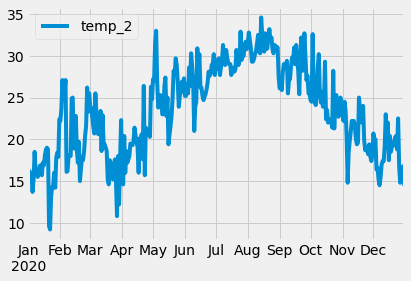

<Figure size 432x288 with 0 Axes>

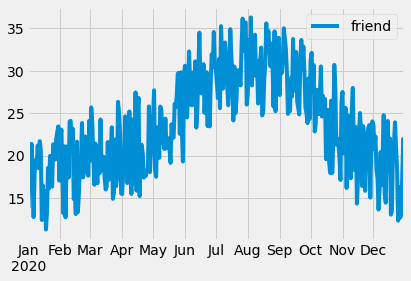

<Figure size 432x288 with 0 Axes>

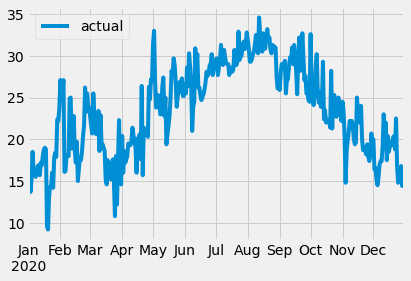

<Figure size 432x288 with 0 Axes>

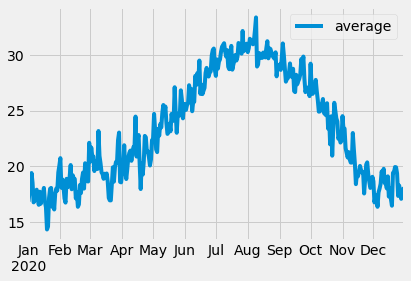

In [46]:
features = pd.read_csv('aemet_db_tidy.csv')
date_index = pd.date_range('01/02/2016', periods=features.shape[0], freq='D')
features.index = date_index
features_2020 = features.query("year == 2020")

cols = ['temp_2', 'friend', 'actual', 'average']
for col in cols:
    plt.figure()
    features_2020[[col]].plot()

### One hot encoding
We need to transform the categorical factor, week day, to a numerical one, if we assign an index from 1 to 7 to every weekday, in the training process it could interpret that the sunday (index 7), has a higher importance which is simply not true, we enconde it using 1 and 0 as displayed below.

In [47]:
features_2020 = pd.get_dummies(features_2020)
features_2020.head(7)

,year,month,day,temp_2,temp_1,average,actual,friend,week_Fri,week_Mon,week_Sat,week_Sun,week_Thu,week_Tue,week_Wed
2020-01-01,2020,1,1,15.4,16.2,16.80,15.1,13.80,0,0,0,0,0,0,1
2020-01-02,2020,1,2,16.2,15.1,17.62,15.6,18.62,0,0,0,0,1,0,0
2020-01-03,2020,1,3,15.1,15.6,17.92,13.7,17.92,1,0,0,0,0,0,0
2020-01-04,2020,1,4,15.6,13.7,19.38,15.2,21.38,0,0,1,0,0,0,0
2020-01-05,2020,1,5,13.7,15.2,18.50,18.5,17.50,0,0,0,1,0,0,0
2020-01-06,2020,1,6,15.2,18.5,16.74,16.1,12.74,0,1,0,0,0,0,0
2020-01-07,2020,1,7,18.5,16.1,16.88,16.0,17.88,0,0,0,0,0,1,0


### Moving to Numpy
For the python library SKlearn, we need to use numpy objects to enter it.

In [48]:
labels = np.array(features_2020['actual'])
features_2020 = features_2020.drop('actual', axis = 1)
feature_list = list(features_2020.columns)
features_2020 = np.array(features_2020)

### Splitting into training and testing
Now we need to split the data from aemet in 2 groups, 75% of the data will be used for training the model and the other 25% remaining random data will be used for testing how good the model performs afterwards.
The label is the value we want to predict and the features are the values we use to predict the label.

In [49]:
train_features, test_features, train_labels, test_labels = train_test_split(features_2020, labels, test_size = 0.25, random_state = 42)
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (274, 14)
Training Labels Shape: (274,)
Testing Features Shape: (92, 14)
Testing Labels Shape: (92,)


### Set our baseline to beat
We already computed the average value of the max temperature of the previous years of that day in that month, so we already have an estimate of the value we want to predict, our model should aim to improve this prediction, otherwise we should try different methods.

In [50]:
baseline_preds = test_features[:, feature_list.index('average')]
baseline_errors = abs(baseline_preds - test_labels)
print('Average baseline error: ', round(np.mean(baseline_errors), 2))

Average baseline error:  1.9


### Training the model
Now we train the model using SKLearn

In [51]:
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_features, train_labels)

RandomForestRegressor(n_estimators=1000, random_state=42)

### Checking how it performs
Now we want to check how well the model performs.

In [52]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_labels)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / test_labels)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 1.52 degrees.
Accuracy: 92.4 %.


### Graphing the trees
We are going to plot a tree of our model and a smaller tree of up to 3 levels down to better see it.

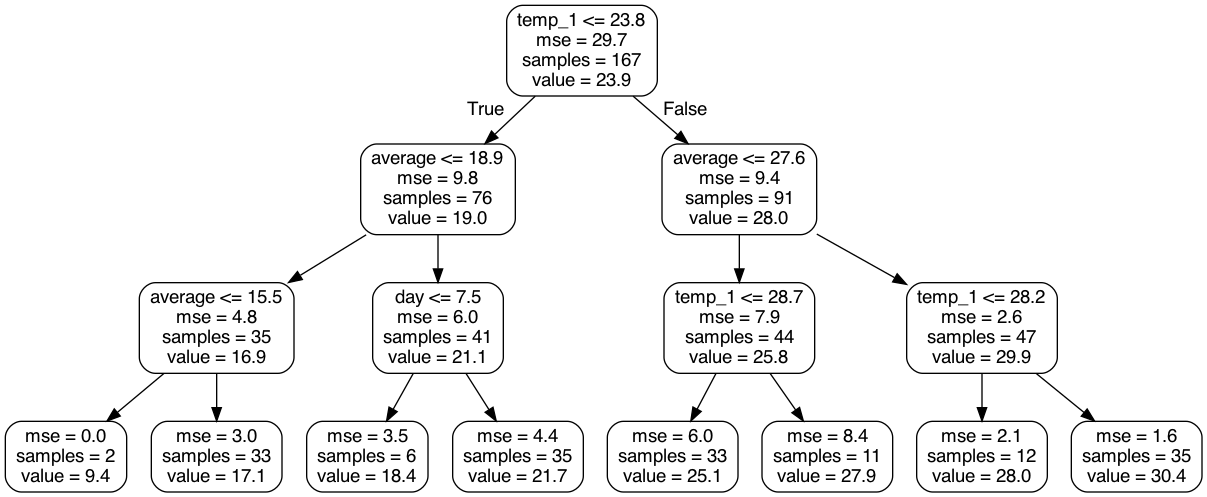

In [53]:
tree = rf.estimators_[5]
tree = rf.estimators_[5]
export_graphviz(tree, out_file='tree.dot', feature_names=feature_list, rounded=True, precision=1)
(graph, ) = pydot.graph_from_dot_file('tree.dot')
graph.write_png('tree.png')
Image(filename='tree.png')

# Graph a smaller tree

rf_small = RandomForestRegressor(n_estimators=10, max_depth = 3)
rf_small.fit(train_features, train_labels)
tree_small = rf_small.estimators_[5]
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = feature_list, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png')
Image(filename='small_tree.png')

### Calculating the important factors
Not all the factors are relevant to the model and they add noise to it.
For example, the day of the week that it is (Monday, Tuesday...) has no relation at all to the temperature of a day, we are going to plot the importance of each factor.
These non relevant variables could be removed to create a better model.

Variable: average              Importance: 0.49
Variable: temp_1               Importance: 0.38
Variable: temp_2               Importance: 0.06
Variable: friend               Importance: 0.03
Variable: day                  Importance: 0.02
Variable: month                Importance: 0.01
Variable: year                 Importance: 0.0
Variable: week_Fri             Importance: 0.0
Variable: week_Mon             Importance: 0.0
Variable: week_Sat             Importance: 0.0
Variable: week_Sun             Importance: 0.0
Variable: week_Thu             Importance: 0.0
Variable: week_Tue             Importance: 0.0
Variable: week_Wed             Importance: 0.0


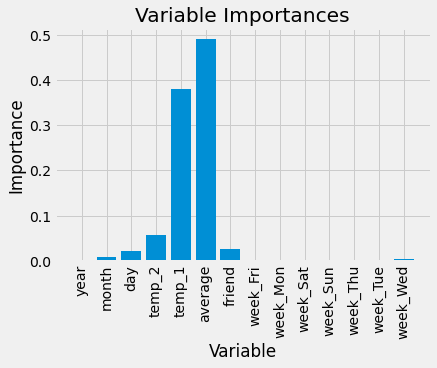

In [54]:
importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances')
plt.show()

### Plot model predictions
We now plot our model predictions for the 25% testing set against the real values.

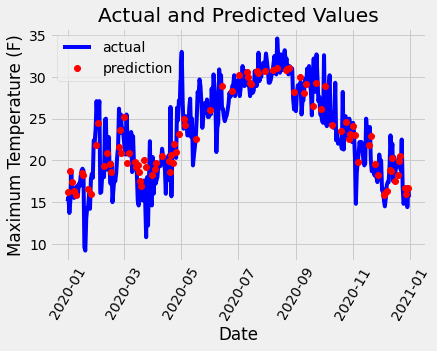

In [55]:
months = features_2020[:, feature_list.index('month')]
days = features_2020[:, feature_list.index('day')]
years = features_2020[:, feature_list.index('year')]
dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in dates]
true_data = pd.DataFrame(data = {'date': dates, 'actual': labels})
months = test_features[:, feature_list.index('month')]
days = test_features[:, feature_list.index('day')]
years = test_features[:, feature_list.index('year')]
test_dates = [str(int(year)) + '-' + str(int(month)) + '-' + str(int(day)) for year, month, day in zip(years, months, days)]
test_dates = [datetime.datetime.strptime(date, '%Y-%m-%d') for date in test_dates]
predictions_data = pd.DataFrame(data = {'date': test_dates, 'prediction': predictions})
plt.plot(true_data['date'], true_data['actual'], 'b-', label = 'actual')
plt.plot(predictions_data['date'], predictions_data['prediction'], 'ro', label = 'prediction')
plt.xticks(rotation = '60')
plt.legend()
plt.xlabel('Date'); plt.ylabel('Maximum Temperature (F)'); plt.title('Actual and Predicted Values')
plt.show()

# Conclusion

Creating machine learning models is really easy nowadays with the help of python and SKLearn, at the end of the day, creating the model was just 3 lines of code.
We obtained pretty good results for our model and it was actually the most basic one to do, we could have improved it quite a bit by tweaking it and adding more relevant data that we have availabe from aemet.
We could have also chosen a different method for predicting temperature but random forest was the topic of this assignment and it indeed ended up beign a good fit after all.

# References

[Decision Trees in ML - towardsdatascience.com](https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052)
[Random Forest Python - towardsdatascience.com](https://www.cienciadedatos.net/documentos/py08_random_forest_python.html)
[Random Forest in Python - towardsdatascience.com](https://towardsdatascience.com/random-forest-in-python-24d0893d51c0)
[Arboles de Decisiones en la Mineria de Datos - towardsdatascience.com](https://conectasoftware.com/analytics/arboles-de-decisiones-en-la-mineria-de-datos/)